# Exploring Pandas with NYC Flights Dataset

R users will recognize this famous dataset as a favorite of Hadley Wickham, author of dplyr.  No matter, we can use it with pandas as
well.

This dataset will give us flight delay data from all flights departing from the three NYC airports (JFK, LGA, EWR) in the year 2013.



In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/nycflights13/flights.csv.gz')

In [3]:
df.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416     5      29  2013-01-01 05:00:00  
2      1089     5      40  2013-01-01 05:00:00  
3      1576     5      45  2013-01-01 05:00:00  
4       762     6       0  2013-01-01 06:00:00

Let us focus on some summary and visualizations that we can do here. Let's start out by finding the average delay by month.  We'll also do a matlibplot on it.

In [6]:
mean_delay_by_month = df.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

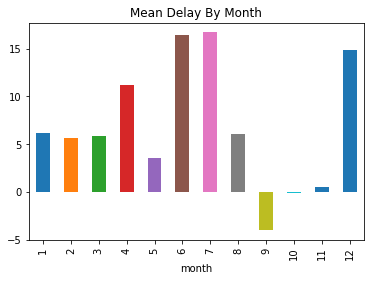

In [7]:
mean_month_plt = mean_delay_by_month.plot(kind='bar', title="Mean Delay By Month")
mean_month_plt

Notice that flights in two months actually have negative delay.  No doubt airlines "pad" flight times to achieve better results.

One would guess that flights to certain airports may have different results. For example, flights to Chicago (ORD) would no doubt be affected by winter weather. Let's take a look at that.

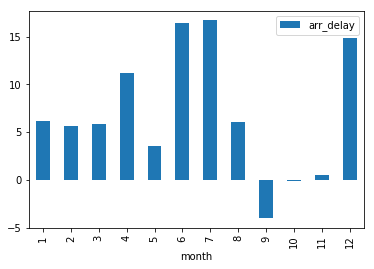

In [8]:
df[['arr_delay', 'month']].groupby('month').mean().plot(kind='bar')


In [9]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
mean_delay_by_month_ord


month
1      7.287694
2      3.680794
3     -2.702473
4     19.179352
5      7.938280
6     13.299376
7      8.405514
8      4.256851
9     -4.745370
10    -1.597090
11     2.071058
12    16.462817
Name: arr_delay, dtype: float64

Flights to Chicago (ORD)
month
1      7.287694
2      3.680794
3     -2.702473
4     19.179352
5      7.938280
6     13.299376
7      8.405514
8      4.256851
9     -4.745370
10    -1.597090
11     2.071058
12    16.462817
Name: arr_delay, dtype: float64


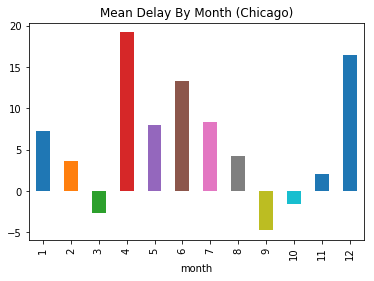

In [10]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
print("Flights to Chicago (ORD)")
print(mean_delay_by_month_ord)

mean_month_plt_ord = mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month (Chicago)")
mean_month_plt_ord


Flights to Los Angeles (LAX)
month
1     -4.160312
2     -7.601824
3     -5.280928
4      3.085153
5     -7.150657
6     13.007027
7      8.191432
8      1.028667
9     -8.719044
10    -1.205694
11    -0.103290
12    10.724460
Name: arr_delay, dtype: float64


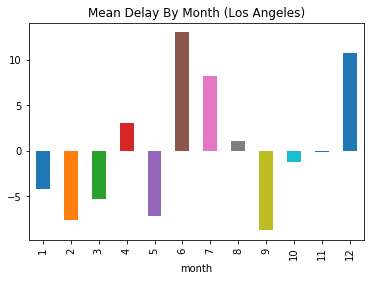

In [11]:
# Let's try Los Angeles and compare that

mean_delay_by_month_lax = df[(df.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Los Angeles (LAX)")
print(mean_delay_by_month_lax)

mean_month_plt_lax = mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")
mean_month_plt_lax

Perhaps we would like to see which Airline carrier is the best for delays.  Here we have some plots to do that.


Text(0.5, 1.0, 'Average Departure Delay by Carrier in 2008, All  airports')

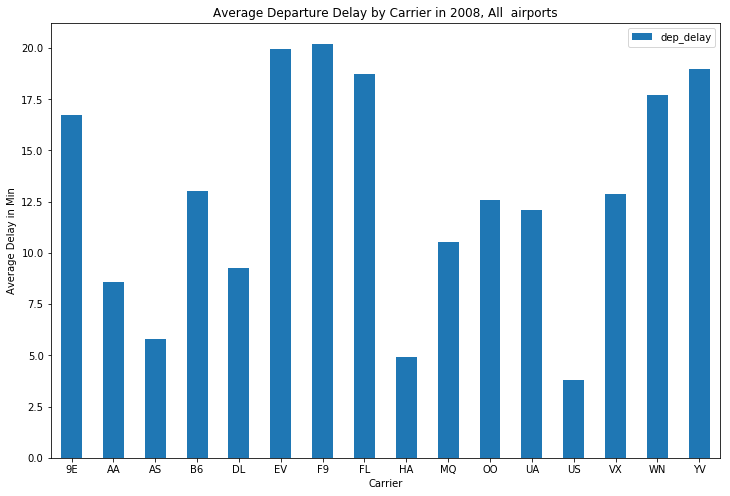

In [12]:
# Examine if specific carrier will create different delay impact
df[['carrier','arr_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All  airports')


df[['carrier','dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2008, All  airports')


We see that F9 (Frontier Airlines) is among the worst in terms of delays, while Hawaiian (HA) is among the best.

### Joins

We have a couple of other tables in our dataset: Weather, and airports. Let's look at these two tables and see if we can perform joins.

In [14]:
weather = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/nycflights13/weather.csv.gz')
weather.head()

origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2012-12-31 19:00:00  
1  15.891535     0.0    1013.0   10.0  2012-12-31 20:00:00  
2  14.567241     0.0    1012.6   10.0  2012-12-31 21:00:00  
3  15.891535     0.0    1012.7   10.0  2012-12-31 22:00:00  
4  17.215830     0.0    1012.8   10.0  2012-12-31 23:00:00

In [16]:
weather.head()

origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2012-12-31 19:00:00  
1  15.891535     0.0    1013.0   10.0  2012-12-31 20:00:00  
2  14.567241     0.0    1012.6   10.0  2012-12-31 21:00:00  
3  15.891535     0.0    1012.7   10.0  2012-12-31 22:00:00  
4  17.215830     0.0    1012.8   10.0  2012-12-31 23:00:00

In [17]:
df_withweather = pd.merge(df, weather, how='left', on=['year','month', 'day', 'hour', 'origin'])
df_withweather.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute          time_hour_x   temp   dewp  humid  wind_dir  \
0      1400     5      15  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
1      1416     5      29  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
2      1089     5      40  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
3      1576     5      45  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
4       762     6       0  2013-01-01 06:00:00  39.92  26.06  57.33     260.0   

   wind_speed  wind_gust  precip  pressure  visib          time_hour_y  
0         NaN        NaN     NaN       NaN    NaN                  NaN  
1         NaN        NaN     NaN       NaN    NaN                  NaN  
2         NaN        NaN     NaN       NaN    NaN                  NaN  
3         NaN        NaN     NaN       NaN    NaN                  NaN  
4    13.80936  15.891535     0.0    1011.9   10.0  2013-01-01 01:00:00

In [18]:
airports = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/nycflights13/airports.csv.gz')
airports.head()

faa                           name        lat        lon   alt  tz dst  \
0  04G              Lansdowne Airport  41.130472 -80.619583  1044  -5   A   
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264  -6   A   
2  06C            Schaumburg Regional  41.989341 -88.101243   801  -6   A   
3  06N                Randall Airport  41.431912 -74.391561   523  -5   A   
4  09J          Jekyll Island Airport  31.074472 -81.427778    11  -5   A   

              tzone  
0  America/New_York  
1   America/Chicago  
2   America/Chicago  
3  America/New_York  
4  America/New_York

In [19]:
df_withairport = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')
df_withairport.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute          time_hour_x   temp   dewp  humid  wind_dir  \
0      1400     5      15  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
1      1416     5      29  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
2      1089     5      40  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
3      1576     5      45  2013-01-01 05:00:00    NaN    NaN    NaN       NaN   
4       762     6       0  2013-01-01 06:00:00  39.92  26.06  57.33     260.0   

   wind_speed  wind_gust  precip  pressure  visib          time_hour_y  faa  \
0         NaN        NaN     NaN       NaN    NaN                  NaN  IAH   
1         NaN        NaN     NaN       NaN    NaN                  NaN  IAH   
2         NaN        NaN     NaN       NaN    NaN                  NaN  MIA   
3         NaN        NaN     NaN       NaN    NaN                  NaN  NaN   
4    13.80936  15.891535     0.0    1011.9   10.0  2013-01-01 01:00:00  ATL   

                              name        lat        lon     alt   tz  dst  \
0     George Bush Intercontinental  29.984433 -95.341442    97.0 -6.0    A   
1     George Bush Intercontinental  29.984433 -95.341442    97.0 -6.0    A   
2                       Miami Intl  25.793250 -80.290556     8.0 -5.0    A   
3                              NaN        NaN        NaN     NaN  NaN  NaN   
4  Hartsfield Jackson Atlanta Intl  33.636719 -84.428067  1026.0 -5.0    A   

              tzone  
0   America/Chicago  
1   America/Chicago  
2  America/New_York  
3               NaN  
4  America/New_York